### Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

### Tasks to be Performed

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

### Data decription 


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



### Skills Gained
- Tensorflow 2.x
- Single Layer Percepton 
- Multiple Layer Percepton
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

In [1]:
%load_ext tensorboard

In [2]:
#installation
import tensorflow as tf
from tensorflow import keras

# checking the version
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


### Preparing the data

### Load the Data
Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
#Loading mnist data
mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
# Data Exploration
print(X_train.shape)   # 60k,28,28 shape is in 3Dimensional 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
y_train[0]

5

In [6]:
X_train[0].shape,X_test[9].shape

((28, 28), (28, 28))

In [7]:
y_test[69]

0

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

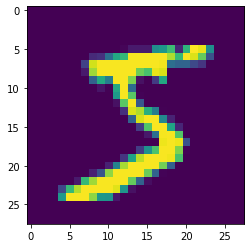

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

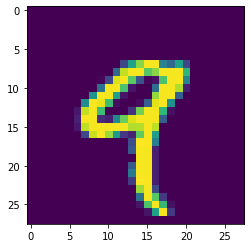

In [9]:
plt.imshow(X_train[4])

## Data Preprocessing

In [10]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784                        # resolution 28x28  = 784 its a 2 Dimensional converted 
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255                                         # X_train = X_train / 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.

y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)


60000 train samples
10000 test samples


In [11]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [12]:
X_train[0:9]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Designing the Model
## **Preparing the Model 0: Single Layer Percepton**

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
model_0.add(Dense(10,input_shape = (784,),name = 'dense_layer',activation = 'softmax'))

In [15]:
model_0.summary()   # here params: input is 10, dense layer is 784 , 784*10 = 7840+10 bias = 7850

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiling the model
model_0.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
print('Total training for data size:',60000*0.8)

Total training for data size: 48000.0


In [18]:
print('Batch size:',48000/128.0)

Batch size: 375.0


In [19]:
# Training the Model
log_dir = "logs/fit/model0"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_0.fit(X_train,y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
  1/375 [..............................] - ETA: 0s - loss: 2.4707 - accuracy: 0.0859WARNING:tensorflow:From C:\Users\Shivani Dussa\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
375/375 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.8320 - val_loss: 0.3590 - val_accuracy: 0.9043
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.9045 - val_loss: 0.3081 - val_accuracy: 0.9135
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.9121 - val_loss: 0.2902 - val_accuracy: 0.9177
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2991 - accuracy: 0.9162 - val_loss: 0.2832 - val_accuracy: 0.9203
Epoch 5/30
375/375 [==============================] - 1s 2

In [20]:
training.history['loss']

[0.6727253198623657,
 0.35115939378738403,
 0.3152327537536621,
 0.29912909865379333,
 0.2896389663219452,
 0.28306418657302856,
 0.2784397602081299,
 0.27430176734924316,
 0.2711622416973114,
 0.2689436972141266,
 0.2668965756893158,
 0.2649165391921997,
 0.2632460594177246,
 0.2618292272090912,
 0.260226309299469,
 0.259233683347702,
 0.2584044933319092,
 0.25709089636802673,
 0.2565394937992096,
 0.2556667625904083,
 0.2546638250350952,
 0.2539767324924469,
 0.25371888279914856,
 0.25320738554000854,
 0.2524958550930023,
 0.2519582509994507,
 0.2514011859893799,
 0.25066083669662476,
 0.25040093064308167,
 0.249439999461174]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


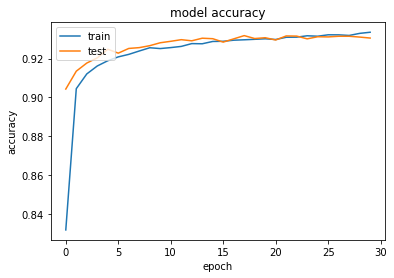

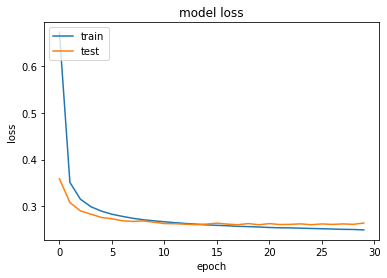

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training

print(training.history.keys())
# summarize training for accuracy

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Evaluate the model
test_loss,test_acc = model_0.evaluate(X_test,y_test)
print('Test Accuracy:',test_acc)

313/313 [==============================] - 0s 674us/step - loss: 0.2761 - accuracy: 0.9264
Test Accuracy: 0.9264000058174133


In [23]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_0.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05233619, -0.08337243,  0.00302058, ..., -0.00460343,
         -0.06736406,  0.06144428],
        [-0.04260384,  0.02707512, -0.05922233, ..., -0.03007742,
          0.05022544, -0.04003507],
        [ 0.03155164, -0.01756909, -0.02862537, ...,  0.04101261,
         -0.05114342, -0.06882622],
        ...,
        [-0.03109576,  0.05150793,  0.05602127, ...,  0.06491246,
         -0.06397226,  0.06227735],
        [ 0.07357284,  0.08641181,  0.00028931, ..., -0.04104117,
          0.04468582, -0.0218389 ],
        [-0.07762155,  0.08557663,  0.05904237, ..., -0.02810107,
         -0.03192994,  0.07701761]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.55547464,  0.70985204,  0.1326921 , -0.41383627,  0.10867654,
         1.4712149 , -0.3313311 ,  0.7446175 , -1.6045744 , -0.45111457],
       dtype=float32)>]

## Improved Model 1: Adding Hidden Layer - Multi Layer Percepton 

In [25]:
# Most common type of model is a stack of layers 
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model
model_1.add(Dense(N_hidden,name = 'dense_layer',input_shape = (784,),activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784) and ouput array of shape (*,64)

# Adding another layer:
model_1.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu')) # after 1st layer we dont want to mention input shape

# Add output layer with 10 output units (10 different classes)
model_1.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))


In [26]:
# compiling the model
model_1.compile(optimizer = 'SGD',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [28]:
# Training the model. 
log_dir = "logs/fit/model1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_1.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback) 

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1578 - accuracy: 0.9549 - val_loss: 0.1642 - val_accuracy: 0.9528
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9551 - val_loss: 0.1620 - val_accuracy: 0.9544
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1519 - accuracy: 0.9565 - val_loss: 0.1597 - val_accuracy: 0.9553
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9569 - val_loss: 0.1576 - val_accuracy: 0.9553
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1462 - accuracy: 0.9579 - val_loss: 0.1548 - val_accuracy: 0.9564
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9585 - val_loss: 0.1534 - val_accuracy: 0.9564
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9596 - val_loss: 0.1523 - val_accuracy: 0.9574
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


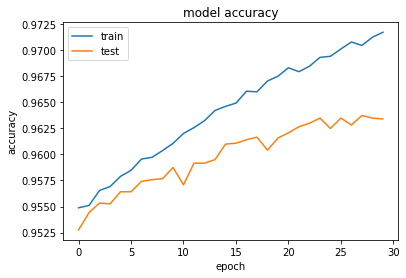

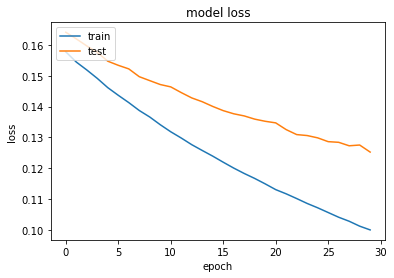

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
 
# List all the data in training
print(training.history.keys())

#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# summarize the training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper left')

In [30]:
# evalute the model
test_loss,test_acc = model_1.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 995us/step - loss: 0.1221 - accuracy: 0.9635
Test accuracy: 0.9635000228881836


In [31]:
test_loss,test_acc = model_1.evaluate(X_test,y_test)
print("test loss:",test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.9635
test loss: 0.12211856991052628


In [32]:
model_1.summary()    # 784*64 + 64 bias = 50240

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 5.8319561e-02, -3.0039549e-02,  2.2306547e-02, ...,
         -7.7585772e-02, -6.1405417e-02, -3.4151558e-02],
        [-6.1425433e-02,  2.6184857e-02, -4.8108540e-02, ...,
          7.6155998e-02, -6.2055893e-02,  4.4186227e-02],
        [-3.7841499e-05, -8.1676200e-02, -4.9924016e-02, ...,
          6.6202208e-03, -5.1070310e-02,  3.1086102e-02],
        ...,
        [ 7.3985256e-02,  7.6651044e-02, -7.7365667e-02, ...,
          7.5774483e-02, -3.5998985e-02, -9.6181929e-03],
        [-5.5966452e-03, -1.9651212e-02, -5.9365585e-02, ...,
         -7.4532367e-02, -4.0567663e-02, -5.5356495e-02],
        [ 8.0229037e-02, -4.3901768e-02, -4.1880980e-03, ...,
          5.5786967e-03, -6.6608712e-02,  7.3464580e-02]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.06511336, -0.0478239 ,  0.00086677, -0.02764735, -0.0671274 ,
         0.07262263,  0.02955263

## Improved Model 2 - Adding Droupout to Avoid Overfitting

In [34]:
from tensorflow.keras.layers import Dropout

# Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
n_hidden = 128

# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(n_hidden,name = 'dense_layer',input_shape = (784,),activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))

# Adding another dense layer
model_2.add(Dense(n_hidden,name = 'dense_layer_2',activation = 'relu'))
model_2.add(Dropout(0.3))

# Adding another dense layer:
#model_2.add(Dense(N_hidden,name = 'dense_layer_3',activation = 'relu'))
#model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [35]:
# compiling the model
model_2.compile(optimizer = 'SGD',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
# Training the model
log_dir = "logs/fit/model2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_2.fit(X_train,y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 1.6925 - accuracy: 0.4600 - val_loss: 0.8924 - val_accuracy: 0.8128
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.9108 - accuracy: 0.7203 - val_loss: 0.5192 - val_accuracy: 0.8722
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.6827 - accuracy: 0.7905 - val_loss: 0.4155 - val_accuracy: 0.8917
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.5862 - accuracy: 0.8218 - val_loss: 0.3636 - val_accuracy: 0.9013
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.5221 - accuracy: 0.8450 - val_loss: 0.3312 - val_accuracy: 0.9069
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4828 - accuracy: 0.8569 - val_loss: 0.3100 - val_accuracy: 0.9127
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4561 - accuracy: 0.8669 - val_loss: 0.2933 - val_accuracy: 0.9170
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


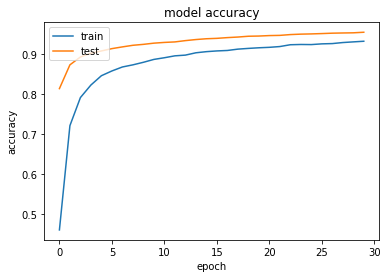

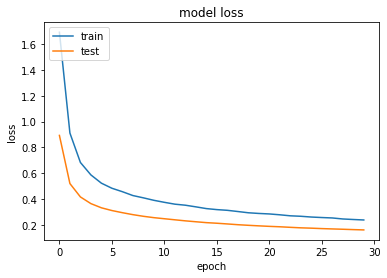

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# List all data in training
print(training.history.keys())

#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
#evaluate the model
test_loss,test_acc = model_2.evaluate(X_test,y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.9511
Test accuracy: 0.9510999917984009


In [39]:
tes_loss,test_acc = model_2.evaluate(X_test,y_test)
print("Loss accuracy:",test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.9511
Loss accuracy: 0.1618952453136444


In [40]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.05131067,  0.06081762,  0.05510814, ...,  0.0132321 ,
          0.02905398, -0.05144092],
        [-0.07953986,  0.04709723, -0.06669105, ..., -0.04684279,
          0.07362992,  0.04027783],
        [ 0.00571538,  0.00539138,  0.04489849, ...,  0.03528064,
          0.04059761,  0.00885125],
        ...,
        [-0.03899555,  0.07803395,  0.04308169, ...,  0.05308273,
          0.04526647, -0.02367837],
        [-0.00428239, -0.07312328,  0.0478472 , ..., -0.03742708,
         -0.01161475,  0.02896038],
        [-0.05795109, -0.00686485, -0.04497369, ..., -0.02107577,
         -0.01703857, -0.07657564]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-8.13269988e-03,  3.69323082e-02,  4.75573987e-02, -6.77636117e-02,
        -1.83570047e-03,  1.91848632e-02,  3.69881443e-03, -2.44126450e-02,
         2.89162807e-02,  1.60956293e-01,  2.17694640e-02, 

## Improved Model 3: Changing the Optimizer - Adam

In [42]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [43]:
# compiling the model
model_3.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [44]:
# Training the model
log_dir = "logs/fit/model3"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_3.fit(X_train,y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.7864 - val_loss: 0.2423 - val_accuracy: 0.9287
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.9010 - val_loss: 0.1878 - val_accuracy: 0.9429
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9179 - val_loss: 0.1600 - val_accuracy: 0.9545
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.9274 - val_loss: 0.1427 - val_accuracy: 0.9595
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.9333 - val_loss: 0.1366 - val_accuracy: 0.9615
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2057 - accuracy: 0.9391 - val_loss: 0.1299 - val_accuracy: 0.9639
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1939 - accuracy: 0.9419 - val_loss: 0.1237 - val_accuracy: 0.9647
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


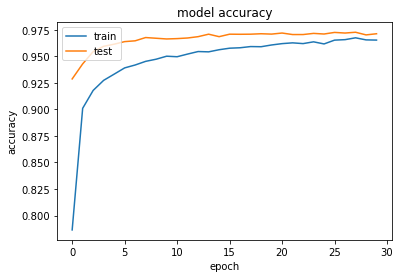

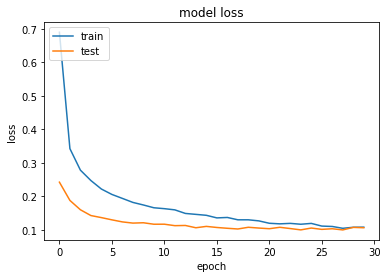

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Evaluate the model
test_loss,test_acc = model_3.evaluate(X_test,y_test)
print("Testing accuracy:",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9702
Testing accuracy: 0.9702000021934509


In [47]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_3.weights

[<tf.Variable 'dense_Layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.04201759, -0.05980306, -0.03534037, ...,  0.02094178,
         -0.01965757,  0.06213868],
        [-0.03985437,  0.06580976, -0.00230688, ...,  0.00919537,
         -0.07725509, -0.06030545],
        [ 0.02118761, -0.04201064,  0.04911941, ..., -0.0079084 ,
         -0.03162283, -0.05862965],
        ...,
        [-0.0766473 , -0.00063538,  0.04536005, ...,  0.03042418,
         -0.052614  ,  0.06841821],
        [-0.04954143, -0.01984689,  0.07833017, ...,  0.07882776,
         -0.03356869, -0.0776487 ],
        [ 0.0224231 , -0.0596984 , -0.00208433, ...,  0.02253415,
          0.04094636,  0.06691942]], dtype=float32)>,
 <tf.Variable 'dense_Layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.29092124,  0.18528955, -0.19040637,  0.07500774,  0.20296708,
         0.00791793,  0.10393602, -0.00919672,  0.17004143,  0.19443297,
         0.02291012, -0.33700275,  0.1143455 , -0.06730403,  0.0591

In [49]:
model_3.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_Layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_Layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
 

## Improved Model 4: Increasing the number of Hidden Layer Neuron

In [50]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify # the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [51]:
# compiling the model
model_4.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [52]:
# training the model
log_dir = "logs/fit/model4"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_4.fit(X_train,y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 5s 14ms/step - loss: 0.3044 - accuracy: 0.9064 - val_loss: 0.1271 - val_accuracy: 0.9626
Epoch 2/30
375/375 [==============================] - 6s 15ms/step - loss: 0.1273 - accuracy: 0.9601 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 3/30
375/375 [==============================] - 5s 13ms/step - loss: 0.0936 - accuracy: 0.9705 - val_loss: 0.0848 - val_accuracy: 0.9745
Epoch 4/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.0801 - val_accuracy: 0.9764
Epoch 5/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0639 - accuracy: 0.9793 - val_loss: 0.0830 - val_accuracy: 0.9752
Epoch 6/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0533 - accuracy: 0.9825 - val_loss: 0.0724 - val_accuracy: 0.9797
Epoch 7/30
375/375 [==============================] - 5s 13ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0746 - val_accuracy: 0.9780

In [53]:
# Evaluate the model
test_loss,test_acc = model_4.evaluate(X_test,y_test)
print("Testing Accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9836
Testing Accuracy: 0.9836000204086304


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


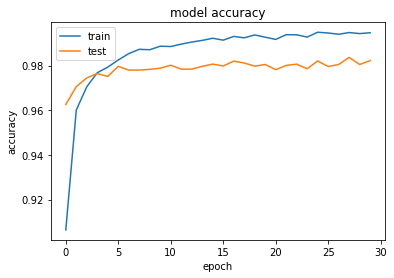

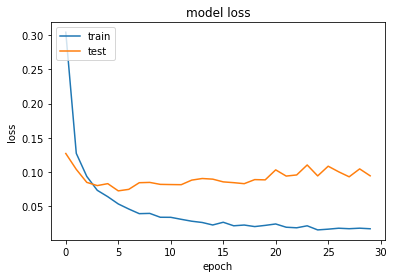

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Improved Model 5: Manipulating the Batch size

In [56]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify # the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [57]:
# compiling the model
model_5.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [58]:
# Training the model. 
log_dir = "logs/fit/model5"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_5.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.2,callbacks=tensorboard_callback) 


Epoch 1/30
188/188 [==============================] - 5s 26ms/step - loss: 0.3631 - accuracy: 0.8907 - val_loss: 0.1469 - val_accuracy: 0.9572
Epoch 2/30
188/188 [==============================] - 5s 24ms/step - loss: 0.1435 - accuracy: 0.9564 - val_loss: 0.1020 - val_accuracy: 0.9679
Epoch 3/30
188/188 [==============================] - 5s 24ms/step - loss: 0.1021 - accuracy: 0.9686 - val_loss: 0.0939 - val_accuracy: 0.9711
Epoch 4/30
188/188 [==============================] - 4s 24ms/step - loss: 0.0779 - accuracy: 0.9747 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 5/30
188/188 [==============================] - 4s 24ms/step - loss: 0.0619 - accuracy: 0.9802 - val_loss: 0.0779 - val_accuracy: 0.9783
Epoch 6/30
188/188 [==============================] - 4s 22ms/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0752 - val_accuracy: 0.9787
Epoch 7/30
188/188 [==============================] - 4s 20ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9776

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


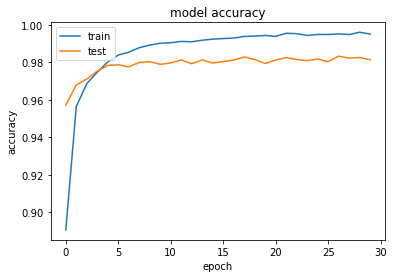

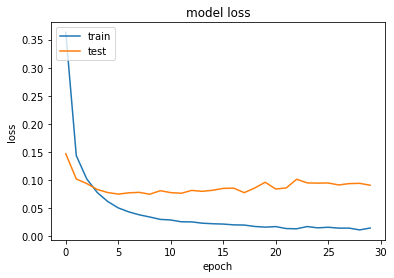

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9828
Test accuracy: 0.9828000068664551


In [61]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_5.weights

[<tf.Variable 'dense_Layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.03446836,  0.03943802, -0.04369894, ...,  0.01507571,
         -0.05972882,  0.05271374],
        [-0.04639262,  0.06068572,  0.03655616, ...,  0.04425776,
          0.05359167, -0.05091743],
        [ 0.00851344,  0.01603954, -0.02261734, ..., -0.01185666,
         -0.05991272,  0.04844002],
        ...,
        [-0.02833301, -0.01466899,  0.01403742, ...,  0.06104521,
          0.03805541,  0.00336831],
        [ 0.00147992,  0.02207343,  0.02071175, ...,  0.02120471,
         -0.01920568,  0.01746929],
        [-0.00166811,  0.01287329,  0.04299231, ..., -0.02433392,
          0.0448928 , -0.00510248]], dtype=float32)>,
 <tf.Variable 'dense_Layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-7.36307129e-02, -7.22994357e-02, -3.63630429e-02, -1.21127618e-02,
        -1.24150865e-01, -1.02778487e-02, -4.89670318e-03, -1.57329999e-02,
        -3.13738510e-02,  5.42965978e-02, -2.12632939e-02, 

In [79]:
model_5.get_config()

{'name': 'sequential_9',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_Layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_Layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_11',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,

## Improved Model 6: Adding another Hidden Layer to the model

In [63]:
import tensorflow as tf

# In keras, layers are assembled to build a models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers

model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden,name = 'dense_layer_3',activation = 'relu'))
model_6.add(Dropout(0.3))

# After the first layer, you don't need to specify # the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10,name = 'dense_layer_4',activation = 'softmax'))

In [64]:
# compiling the model
model_6.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [65]:
# Training the model. 
log_dir = "logs/fit/model6"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_6.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback) 

Epoch 1/30
375/375 [==============================] - 8s 21ms/step - loss: 0.3219 - accuracy: 0.9010 - val_loss: 0.1212 - val_accuracy: 0.9632
Epoch 2/30
375/375 [==============================] - 7s 20ms/step - loss: 0.1397 - accuracy: 0.9578 - val_loss: 0.1064 - val_accuracy: 0.9687
Epoch 3/30
375/375 [==============================] - 7s 19ms/step - loss: 0.1021 - accuracy: 0.9685 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 4/30
375/375 [==============================] - 7s 18ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.0850 - val_accuracy: 0.9757
Epoch 5/30
375/375 [==============================] - 7s 19ms/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.0810 - val_accuracy: 0.9762
Epoch 6/30
375/375 [==============================] - 7s 19ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0834 - val_accuracy: 0.9765
Epoch 7/30
375/375 [==============================] - 7s 19ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0883 - val_accuracy: 0.9760

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


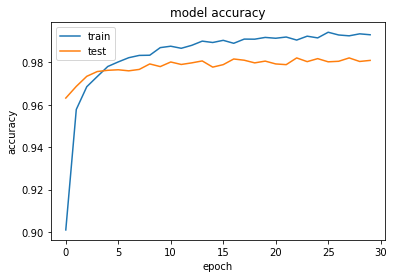

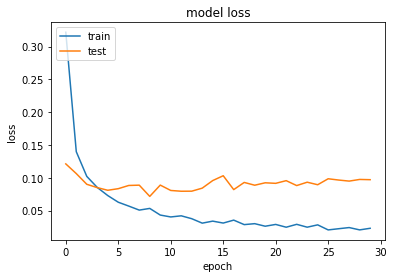

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0826 - accuracy: 0.9827
Test accuracy: 0.982699990272522


In [68]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 10)               

In [69]:
model_6.weights

[<tf.Variable 'dense_Layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02827872,  0.03144938,  0.06715932, ...,  0.027658  ,
          0.04029998,  0.01793858],
        [-0.02379318,  0.06206408, -0.04368559, ...,  0.00118637,
         -0.05703619,  0.00837189],
        [-0.00247756, -0.00435563,  0.01222659, ..., -0.06545755,
          0.04791114, -0.03394008],
        ...,
        [-0.03841591, -0.01220005, -0.04604603, ..., -0.02814897,
         -0.03157913, -0.04950291],
        [ 0.00639094, -0.05232073, -0.02087744, ..., -0.02255971,
          0.0105256 , -0.02268973],
        [-0.06154853, -0.05975075, -0.01779734, ...,  0.06483245,
         -0.03996272, -0.00173841]], dtype=float32)>,
 <tf.Variable 'dense_Layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.52455804e-02, -4.60202284e-02, -5.61520085e-02, -1.72487535e-02,
         1.72296222e-02,  6.14456041e-03, -6.76148012e-02, -6.38967752e-02,
         3.06021306e-03, -2.56653801e-02,  5.45298448e-03, 

In [70]:
model_6.get_config()

{'name': 'sequential_6',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_Layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_Layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
